In [1]:
print("\u0905\u0928\u0940\u0936")

अनीश


In [2]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.pyplot as plt

In [16]:
file_path = "Market_Basket_Optimisation.csv"
dataset = pd.read_csv(file_path)

In [17]:
dataset.head()

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:

# Data Preprocessing: Replace NaN values and convert to list of transactions
dataset.fillna('', inplace=True)
transactions = []
for i in range(0, len(dataset)):
    transaction = [str(item) for item in dataset.iloc[i] if item != '']
    transactions.append(transaction)

C:\temp\ipykernel_10096\219227314.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  dataset.fillna('', inplace=True)


In [19]:
# Convert transactions into one-hot encoded format
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)
df.head()

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [20]:

# Define the function to get association rules with given support and confidence
def get_rules(min_support, min_confidence):
    frequent_itemsets = apriori(df, min_support=min_support, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)
    return rules

# Initialize the list to store results
results = []

# Try different values for support and confidence
support_values = [0.01, 0.02, 0.03, 0.04]
confidence_values = [0.2, 0.3, 0.4, 0.5]

for support in support_values:
    for confidence in confidence_values:
        rules = get_rules(support, confidence)
        results.append({
            'support': support,
            'confidence': confidence,
            'num_rules': len(rules)
        })

# Convert results to a DataFrame for easy viewing
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

# You can then select the optimal combination based on the number of rules generated.


    support  confidence  num_rules
0      0.01         0.2        162
1      0.01         0.3         63
2      0.01         0.4         17
3      0.01         0.5          2
4      0.02         0.2         56
5      0.02         0.3         20
6      0.02         0.4          3
7      0.02         0.5          0
8      0.03         0.2         27
9      0.03         0.3          7
10     0.03         0.4          1
11     0.03         0.5          0
12     0.04         0.2          9
13     0.04         0.3          4
14     0.04         0.4          1
15     0.04         0.5          0


In [21]:
# Train Apriori algorithm on the dataset with a minimum support of 0.02
frequent_itemsets = apriori(df, min_support=0.02, use_colnames=True)

In [22]:
# Generate association rules with a minimum confidence of 0.3
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)


In [27]:
# Determine the maximum length of itemsets
max_length = frequent_itemsets['itemsets'].apply(len).max()

# Filter the frequent itemsets that have the maximum length
last_table = frequent_itemsets[frequent_itemsets['itemsets'].apply(len) == max_length]

# Rounding the support values to 3 decimal places
last_table = last_table.round(3)

# Reset the index, starting the number from 1
last_table = last_table.reset_index(drop=True)
last_table.index += 1

# Display the last table of frequent itemsets with row numbers starting from 1
print(last_table)


    support                            itemsets
1     0.029                     (burgers, eggs)
2     0.022             (french fries, burgers)
3     0.024            (burgers, mineral water)
4     0.021                (spaghetti, burgers)
5     0.027               (cake, mineral water)
6     0.023            (chicken, mineral water)
7     0.033                   (chocolate, eggs)
8     0.034           (french fries, chocolate)
9     0.023      (chocolate, frozen vegetables)
10    0.023              (green tea, chocolate)
11    0.023            (chocolate, ground beef)
12    0.032                   (chocolate, milk)
13    0.053          (chocolate, mineral water)
14    0.039              (chocolate, spaghetti)
15    0.020        (cooking oil, mineral water)
16    0.036                (french fries, eggs)
17    0.022           (frozen vegetables, eggs)
18    0.025                   (green tea, eggs)
19    0.020                 (ground beef, eggs)
20    0.031                        (milk

In [28]:
# Display the generated rules with values rounded to 2 decimal points
rounded_rules = rules.round(2)  # Round all numeric columns to 2 decimal points
print(rounded_rules.head(20).to_string(index=True))

            antecedents      consequents  antecedent support  consequent support  support  confidence  lift  leverage  conviction  zhangs_metric
0             (burgers)           (eggs)                0.09                0.18     0.03        0.33  1.84      0.01        1.22           0.50
1                (cake)  (mineral water)                0.08                0.24     0.03        0.34  1.42      0.01        1.15           0.32
2             (chicken)  (mineral water)                0.06                0.24     0.02        0.38  1.59      0.01        1.23           0.40
3           (chocolate)  (mineral water)                0.16                0.24     0.05        0.32  1.35      0.01        1.12           0.31
4         (cooking oil)  (mineral water)                0.05                0.24     0.02        0.39  1.65      0.01        1.26           0.42
5     (frozen smoothie)  (mineral water)                0.06                0.24     0.02        0.32  1.34      0.01        1.12 

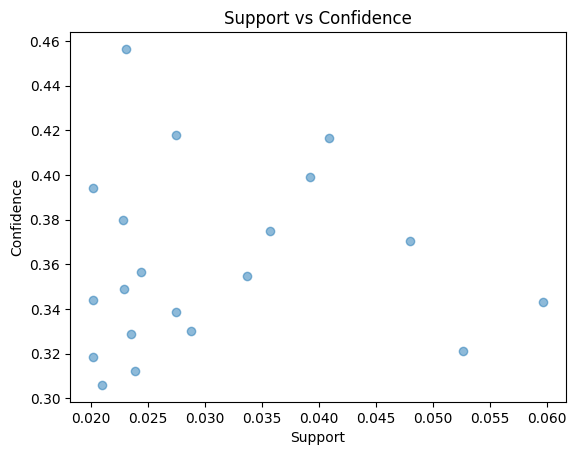

In [29]:
# Plotting support vs confidence for rules
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence')
plt.show()

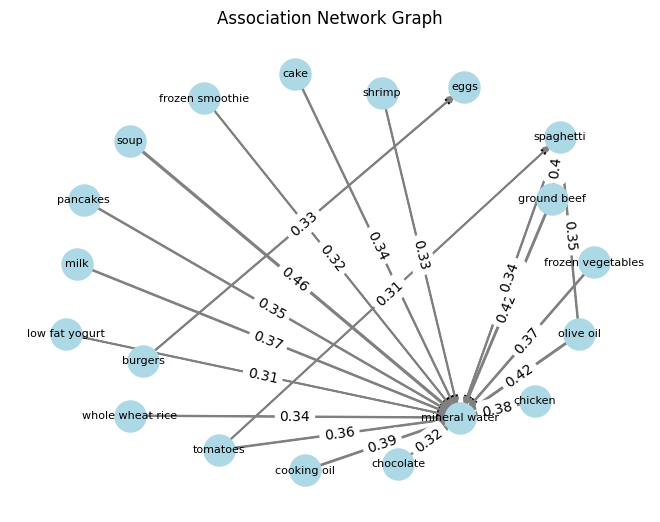

In [30]:


# Initialize a directed graph
G = nx.DiGraph()

# Add edges to the graph based on association rules
for _, rule in rules.iterrows():
    antecedents = ', '.join(list(rule['antecedents']))
    consequents = ', '.join(list(rule['consequents']))
    G.add_edge(antecedents, consequents, weight=rule['confidence'])

# Define the layout for the graph
pos = nx.spring_layout(G, k=500)  # 'k' controls the distance between nodes

# Draw the nodes with labels
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=8, arrows=True)

# Draw edges with varying thickness based on confidence (rule strength)
edges = G.edges(data=True)
nx.draw_networkx_edges(G, pos, edgelist=edges, width=[rule['weight']*5 for (_, _, rule) in edges], edge_color='gray')

# Add labels to edges (showing the confidence of the rule)
edge_labels = {(ante, cons): f"{round(data['weight'], 2)}" for (ante, cons, data) in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Show the graph
plt.title("Association Network Graph")
plt.show()
